<a href="https://colab.research.google.com/github/dhruv369/ComputerVision/blob/master/stable_diffusion_xl_1_0_inpainting_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U diffusers

## Local Inference on GPU

In [3]:
pip install -U diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 5.0.0
    Uninstalling transformers-5.0.0:
      Successfully uninstalled transformers-5.0.0


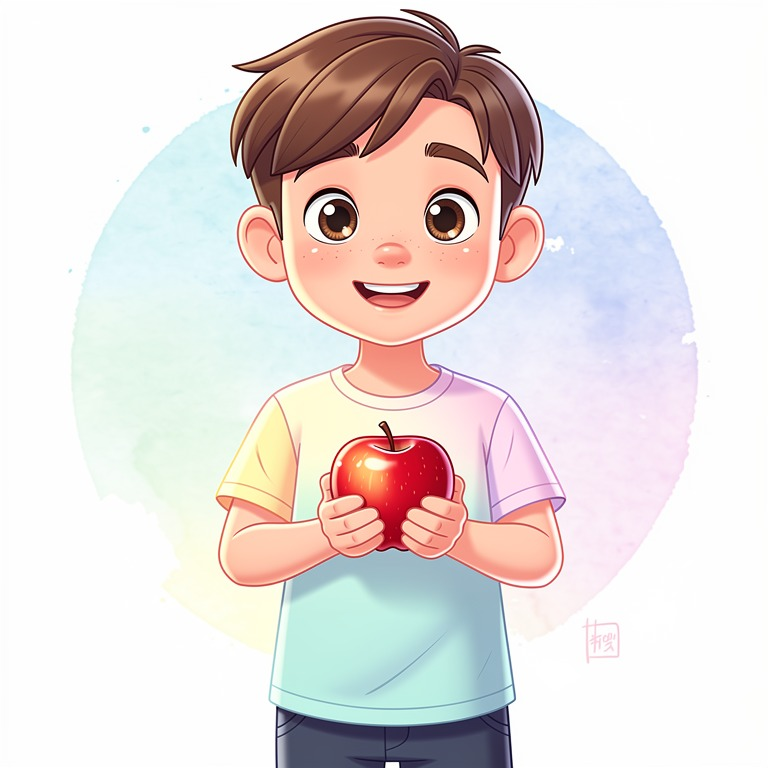

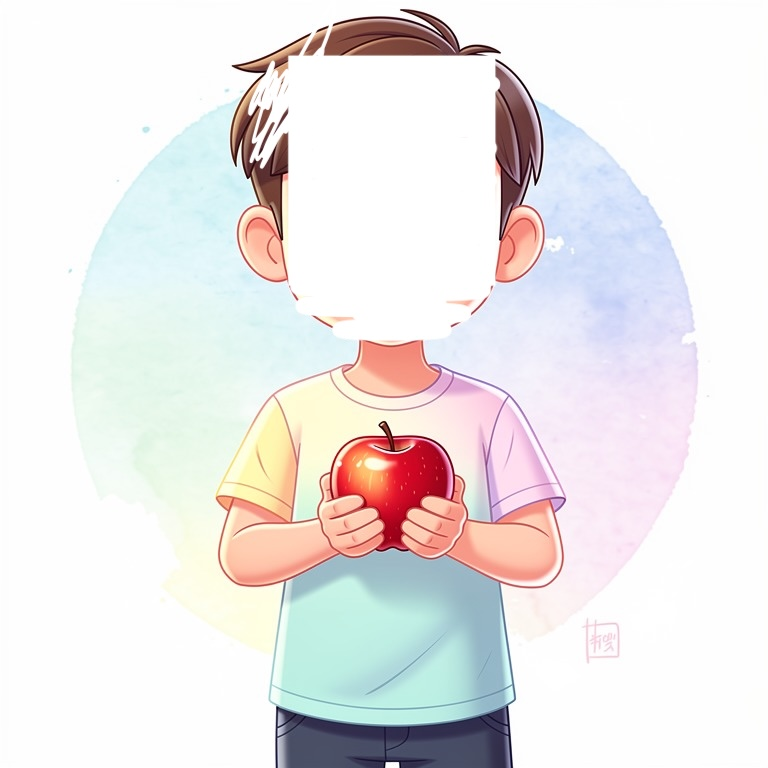

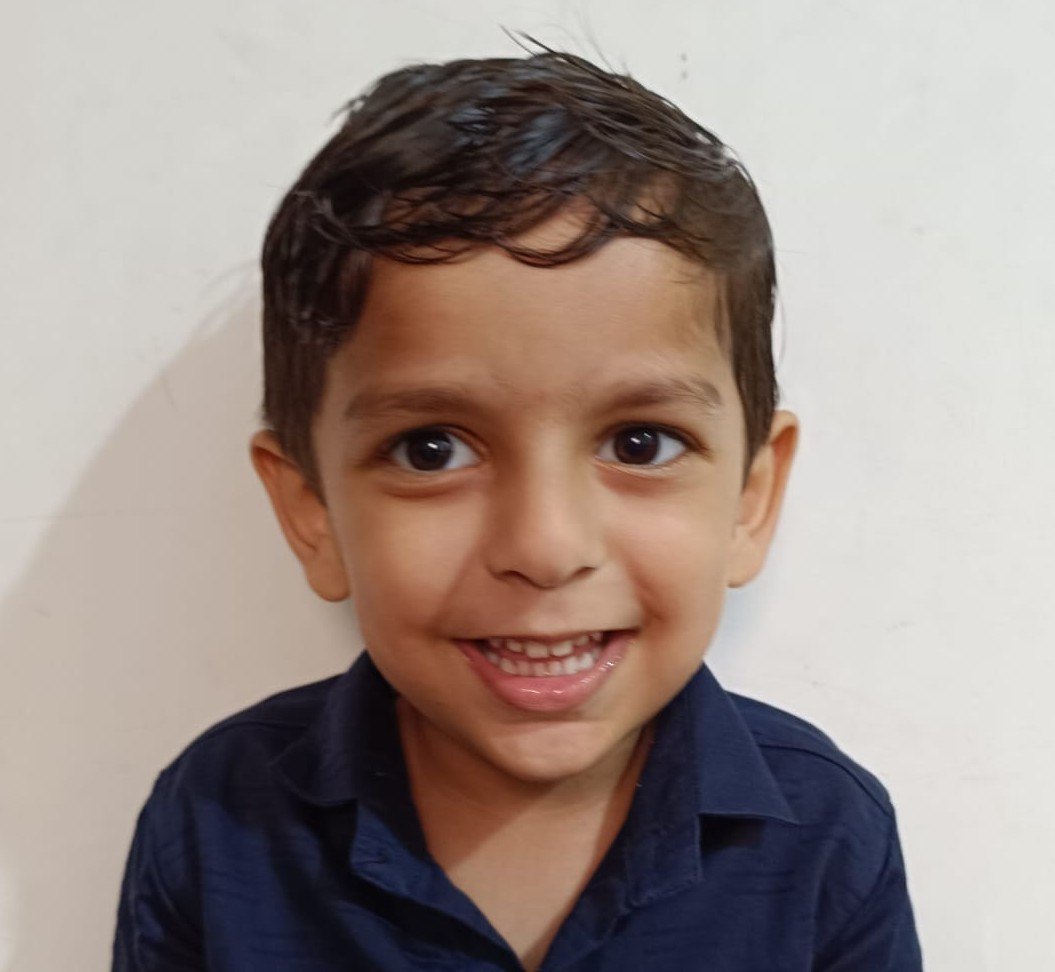

In [9]:
from PIL import Image
from IPython.display import display

init_image = Image.open("/content/init.png").convert("RGB")
mask_image = Image.open("/content/mask.png").convert("RGB")
face_image = Image.open("/content/face.png").convert("RGB")

display(init_image)
display(mask_image)
display(face_image)

In [11]:
import os

import torch
from PIL import Image
from diffusers import StableDiffusionXLInpaintPipeline

device = "cuda"

In [12]:
# Load inpaint pipeline
pipe = StableDiffusionXLInpaintPipeline.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float16,
)
pipe.to(device)

# Optional: helps memory on M-series
pipe.enable_attention_slicing()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

CLIPTextModelWithProjection LOAD REPORT from: /root/.cache/huggingface/hub/models--diffusers--stable-diffusion-xl-1.0-inpainting-0.1/snapshots/115134f363124c53c7d878647567d04daf26e41e/text_encoder_2
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--diffusers--stable-diffusion-xl-1.0-inpainting-0.1/snapshots/115134f363124c53c7d878647567d04daf26e41e/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [14]:
prompt = (
    "A natural-looking human face with realistic facial proportions and a pleasant expression, "
    "rendered in the exact same cartoon style as the original image, matching the line art, "
    "shading style, color palette, and lighting direction, seamless blend with the surrounding art"
)

negative_prompt = (
    "photorealistic, real photo, 3d render, CGI, plastic skin, uncanny, deformed, mutated, "
    "extra eyes, extra teeth, bad anatomy, asymmetry, blurry, low quality, noise, watermark, text"
)

In [ ]:
generator = torch.Generator("cuda").manual_seed(42)  # optional reproducibility

result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=init_image,
    mask_image=mask_image,
    strength=0.65,            # try 0.55–0.75 for faces
    guidance_scale=7.0,       # try 6–8
    num_inference_steps=35,   # try 25–45
    generator=generator,
)

out = result.images[0]
out

  0%|          | 0/22 [00:00<?, ?it/s]

In [ ]:
out.save("face_inpaint.png")

from google.colab import files
files.download("face_inpaint.png")